In [132]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import yfinance as yf
from sklearn.linear_model import LinearRegression

___

### Train Data

In [133]:
btc = yf.Ticker("BTC-USD")

startDate = dt.datetime(2016,1,1)
endDate = dt.datetime(2021,1,1)
btcTrain = btc.history(start=startDate, end=endDate).drop(["Dividends", "Stock Splits", "Volume"], axis = 1)
btcTrain=btcTrain.set_index(np.arange(btcTrain.shape[0]))

startDate = dt.datetime(2016,1,2)
endDate = dt.datetime(2021,1,2)
btcTomorrowTrain = btc.history(start=startDate, end=endDate).drop(["Dividends","Stock Splits","Volume","High","Low","Open"], axis = 1)
btcTomorrowTrain=btcTomorrowTrain.set_index(np.arange(btcTomorrowTrain.shape[0]))

btcTrain["CloseTomorrow"] = btcTomorrowTrain["Close"]
btcTrain

,Open,High,Low,Close,CloseTomorrow
0,425.875000,432.920990,418.734985,430.566986,434.334015
1,430.721008,436.246002,427.515015,434.334015,433.437988
2,434.622009,436.062012,431.869995,433.437988,430.010986
3,433.578003,433.743011,424.705994,430.010986,433.091003
4,430.061005,434.516998,429.084015,433.091003,431.959991
...,...,...,...,...,...
1823,26439.373047,28288.839844,25922.769531,26272.294922,27084.808594
1824,26280.822266,27389.111328,26207.640625,27084.808594,27362.437500
1825,27081.810547,27370.720703,25987.298828,27362.437500,28840.953125
1826,27360.089844,28937.740234,27360.089844,28840.953125,29001.720703


### Test Data

In [134]:
startDate = dt.datetime(2021,1,1)
endDate = dt.datetime(2022,1,10)
btcTest = btc.history(start=startDate, end=endDate).drop(["Dividends", "Stock Splits", "Volume"], axis = 1)
btcTest=btcTest.set_index(np.arange(btcTest.shape[0]))


startDate = dt.datetime(2021,1,2)
endDate = dt.datetime(2022,1,11)
btcTomorrowTest = btc.history(start=startDate, end=endDate).drop(["Dividends","Stock Splits","Volume","High","Low","Open"], axis = 1)
btcTomorrowTest=btcTomorrowTest.set_index(np.arange(btcTomorrowTest.shape[0]))

btcTest["CloseTomorrow"] = btcTomorrowTest["Close"]
btcTest

,Open,High,Low,Close,CloseTomorrow
0,28841.574219,29244.876953,28201.992188,29001.720703,29374.152344
1,28994.009766,29600.626953,28803.585938,29374.152344,32127.267578
2,29376.455078,33155.117188,29091.181641,32127.267578,32782.023438
3,32129.408203,34608.558594,32052.316406,32782.023438,31971.914062
4,32810.949219,33440.218750,28722.755859,31971.914062,33992.429688
...,...,...,...,...,...
370,45899.359375,46929.046875,42798.222656,43569.003906,43160.929688
371,43565.511719,43748.718750,42645.539062,43160.929688,41557.902344
372,43153.570312,43153.570312,41077.445312,41557.902344,41733.941406
373,41561.464844,42228.941406,40672.277344,41733.941406,41911.601562


____

### Model

In [135]:
linearModel = LinearRegression()
model = linearModel.fit(btcTrain.drop(["CloseTomorrow"], axis = 1),btcTrain["CloseTomorrow"])

### Test

In [142]:
results = []
for i in range(btcTest.shape[0]):
    data = []
    for j in range(4):
        data.append([btcTest.iloc[i][j]])
    data = pd.DataFrame(data).T
    results.append(model.predict(data)[0])
btcTest.shape[0]

375

____

### Visualizition

#### History Index

In [137]:
startDate = dt.datetime(2021,1,1)
endDate = dt.datetime(2022,1,10)
history = btc.history(start=startDate, end=endDate)

#### Lineplot

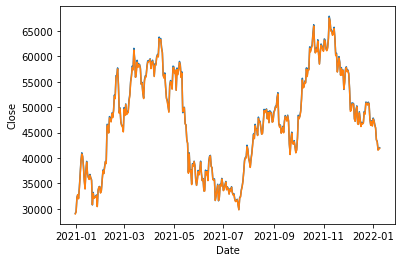

In [138]:
sns.lineplot(y=results, x=history.index)
sns.lineplot(y=btcTest["Close"], x=history.index);

In [152]:
for j in range(4):
        data.append([btcTest.iloc[-1][j]])
data
data = pd.DataFrame(data).T
model.predict(data)[0]

42024.90802924305